<a href="https://colab.research.google.com/github/nataliaiglesiasbueno/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Copia_de_3_1_Clasificacion_binaria_criticas_peliculas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clasificar Críticas de Películas: Ejemplo de Clasificación Binaria

- **Clasificación Binaria**: Problema de Machine Learning más común
- **IMDB**: Internet Movie Data Base: **50K críticas** muy polarizadas (25K entrenamiento y 25K test) (50% Positivas = 1, 50% Negativas =0)
(IMPORTANTE QUE LOS DATOS EQUILIBRADOS; NO PUEDE HABER MÁS MUESTRAS DE UNA CLASE QUE DE OTRA. ES MEJOR QUITAR DATOS Y TENERLOS POLARIZADOS QUE DEJARLOS Y QUE NO LO ESTÉN)
- Nunca probar un modelo con los mismos datos que hemos usado para entrenarlo. Nos interesa el **rendimiento con datos nuevos**
- IMDB está incluida en Keras
- Textos de críticas ya **procesadas** (cada palabra es un dígito de un diccionario de 10K palabras)
- Con ``num_words=10000`` solo mantiene las 10K palabras que más aparecen en los datos de entrenamiento. Se **descartan las palabras raras**. Tamaño manejable

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# (num_words=10000) especifica que solo se utilizarán las 10,000 palabras más comunes en las críticas,
# mientras que las palabras menos frecuentes se codificarán como números enteros especiales

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0] # Crítica codificada (sin palabras poco usadas) (Reflexión sobre esto)

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
len(train_data[0])
# La longitud de una crítica (es decir, el número de palabras en una crítica)
# varía de una crítica a otra. En este ejemplo, la 1º crítica tiene una longitud de
# 218, lo que significa que consiste en 218 palabras únicas o tokens.
# Al utilizar num_words=10000, se garantiza que todas las palabras en las críticas se
# mapearán a números enteros dentro de un rango de 1 a 10,000, y las palabras fuera de este
# rango se tratarán como palabras desconocidas o especiales en la codificación.

218

In [4]:
# mostramos etiquetas de las críticas en el conjunto de entrenamiento (train_labels).
# Las etiquetas son valores binarios, donde 1 generalmente indica una crítica positiva y 0 indica una crítica negativa.
print(train_labels)
train_labels[0] # Crítica positiva

[1 0 0 ... 0 1 0]


1

In [5]:
# Ningún índice de palabras excederá las 10K palabras porque solo usamos las 10K más frecuentes

# Para cada crítica (representada como una secuencia de índices de palabras),
# se calcula el valor máximo de los índices de palabras dentro de esa crítica utilizando la función max(sequence).
# luego se  genera una lista de los valores máximos de los índices de palabras en todas
# las críticas del conjunto de entrenamiento y se calcula el maximo de esta.
max([max(sequence) for sequence in train_data])

9999

Por si se tiene la curiosidad de cual es la crítica en cuestión:

In [6]:
# VAMOS A DECODIFICAR UNA CRTICA DEL CONJUNTO, ES DECIR CONVERTIR UNA SECUENCIA DE INDICES DE PALABRAS EN PALABRAS REALES

# word_index es el diccionario que mapea cada palabra con un ínidice entero.
# Es decir, asocia cada palabra en un conjunto de datos con un número entero único.
word_index = imdb.get_word_index()
# print(word_index)

# Invierte el diccionario word_index. Ahora, en lugar de mapear palabras a índices, reverse_word_index mapea índices a palabras.
# Esto será útil para convertir los índices de palabras en palabras reales durante la decodificación
# Es decir, lo invertimos, asignando índices de enteros a palabras
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# print(reverse_word_index)

# Decodificamos la crítica. Los índices están desviados en 3, porque 0, 1 y 2
# están reservados para "relleno", "inicio de secuencia" y "desconocido"

# i - 3 se utiliza para obtener el índice real en el diccionario reverse_word_index.
# Si el índice no se encuentra en el diccionario, se utiliza el signo de interrogación "?" como valor predeterminado
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparación de Datos

**  En el contexto del aprendizaje automático y las redes neuronales, los tensores son la estructura de datos fundamental utilizada para almacenar y manipular información. Los tensores pueden tener diferentes dimensiones, como escalares (0D), vectores (1D), matrices (2D) y tensores de orden superior (3D o más).

No podemos meter en la RNA una lista de enteros, hay que convertirlo a tensores. Dos formas de hacerlo:

1. Rellenar las listas para que tengan la misma longitud y convertirlas en un tensor de enteros con la forma (muestras, indices_palabras), luego usar como primera capa en nuestra red una capa capaz de manejar esos tensores de enteros (la capa `*Embedding*`, que veremos más adelante).
2. Utilizar **codificación one-hot** en las listas para convertirlas en vectores de 0 y 1 (represnetacion binaria). Concretamente, esto significaría, por ejemplo, convertir la secuencia [3, 5] en un vector de 10k dimensiones que sería todo ceros excepto los índices 3 y 5, que serían unos. Entonces podríamos usar como primera capa en nuestra red una capa **`Dense`**, capaz de manejar datos vectoriales de punto flotante.

 Es útil cuando se quiere tratar cada palabra de manera independiente y no aprender relaciones semánticas entre ellas. Esto se debe a que al codificarlo, **no le da improtancia a la frecuencia**, pues con que una palabra aparezca, habrá un 1 en ele vector (pero si aparece varias veces, seguirá siendo un 1). Por eso, como habrá palabras que se repitan solo una vez y otras que varias, pero todas tendrán un valor de 1, **la relación que se pueda sacar de la frecuencia de palabras se pierde.**


** Las embeddings suelen ser más efectivas para capturar relaciones semánticas, mientras que la codificación one-hot se utiliza cuando se necesita una representación independiente y binaria de las palabras.

Iremos con la segunda solución. Vectoricemos nuestros datos, lo que haremos manualmente para mayor claridad:

In [8]:
import numpy as np

# Aquí se define una función llamada vectorize_sequences que toma dos argumentos:
# sequences (una lista de secuencias de índices de palabras) y dimension
# (un valor que representa la dimensión del espacio vectorial. = 10,000).
# Esta función se utiliza para convertir las secuencias de indices de palabras en representaciones one-hot.

def vectorize_sequences(sequences, dimension=10000):
    # Crea matriz de ceros con la forma (len(sequences), dimension)
    # La matriz contendrá los vectores one-hot resultantes. La 1º dimensión de la matriz (FILAS)
    # corresponde al número de secuencias en sequences, y la 2º dimensión (COLUMNAS) corresponde a la dimensión especificada (10,000)
    # Así, cada vector tendra 10000 posiciones.
    results = np.zeros((len(sequences), dimension))

    #  Para cada secuencia, se establecen los elementos correspondientes en la fila i de la matriz results en 1.
    # Esto se hace para los índices de palabras que aparecen en la secuencia.
    # En otras palabras, se convierten los índices de palabras en representaciones one-hot,
    # donde todos los valores son ceros excepto el índice específico de la palabra, que se establece en 1.
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Pasa índices específicos de results[i] a 1s
    return results

# VECTORIZAMOS
# vectorize_sequences se usa para la preparación de datos y la consistencia. Al crear una función especifica,
# se asegura que todas las secuencias de datos, tanto las de entrenamiento como las de prueba, se conviertan de manera consistente
# en vectores one-hot con la misma dimensión, lo que es importante para entrenar modelos de aprendizaje automático.

# Además, la función vectorize_sequences permite especificar la dimensión del vector one-hot (en este caso, 10,000).
# Esto es útil porque puede haber un conjunto de datos donde el número de palabras únicas sea mayor o menor, y al ajustar
# la dimensión, se asegura que todas las secuencias se representen en un espacio vectorial uniforme.

# En resumen, la representación one-hot es una forma de vectorización, y la función vectorize_sequences
# se utiliza para garantizar la uniformidad y la consistencia en la representación de las secuencias
# en un formato específico que se puede utilizar directamente como entrada para modelos de aprendizaje automático.

# Datos de entrenamiento vectorizados
x_train = vectorize_sequences(train_data)
# Datos de prueba vectorizados
x_test = vectorize_sequences(test_data)

In [9]:
# vector one-hot que codifica la primera crítica del conjunto de entrenamiento en un
# espacio vectorial de 10,000 dimensiones, donde cada dimensión representa una palabra única
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# Convertimos el vector de etiquetas en un tensor Numpy de coma flotante
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

Ahora los datos ya están listos para que pasen a la red neuronal

## Construcción de la Red

* Datos de entrada: vectores y etiquetas escalares (1 y 0)
* Un tipo de red que funciona bien con este problema es una simple pila de capas completamente conectadas (densas) con activaciones relu: `Dense(16,activación = 'relu')`
* El 16 es el número de "unidades ocultas" de la capa (una dimensión en el espacio de representación de la capa).
* Cada capa `Dense` con una activación `relu` implementa la siguiente cadena de operaciones de tensor:
```python
salida=relu(dot(W,entrada)+b)
```
* Tener 16 unidades ocultas significa que la **matriz de peso W** tendrá **forma (input_dimension, 16)**, es decir, el producto escalar con W proyectará los datos de entrada en un espacio de representación de 16 dimensiones (y luego agregaríamos el vector de sesgo y la operación ``relu``).
* Intuitivamente, la dimensionalidad de nuestro espacio de representación es **"cuánta libertad permitimos que tenga la red cuando aprende representaciones internas"**. A **mayor número de unidades ocultas** (un espacio de representación de mayor dimensión) **mayor complejidad de representaciones** que permitimos que la red aprenda, pero hace que la **red sea más costosa** computacionalmente y puede conducir al **aprendizaje de patrones no deseados** (patrones que mejorarán el rendimiento en los datos de entrenamiento pero no en el datos de prueba).

Dos **decisiones clave** de arquitectura que se deben tomar sobre dicha pila de capas densas:

* Cuántas capas usar.
* Cuántas "unidades ocultas" elegir para cada capa.

Aprenderemos los principios formales que os guiarán en la toma de estas decisiones, más adelante. Confiar en mi que ahora lo ideal son **dos capas intermedias con 16 unidades ocultas cada una**, y una **tercera capa que generará la predicción escalar** con respecto al sentimiento de la revisión actual.

Las **capas intermedias** usarán ``relu`` como **"función de activación"**, y la **capa final** usará una activación **sigmoidea** para **generar una probabilidad** (una puntuación entre 0 y 1, que indica la probabilidad de que la muestra tenga el objetivo "1", es decir, la probabilidad de que la revisión sea positiva).

Un ``relu`` (**unidad lineal rectificada**) es una **función destinada a poner a cero los valores negativos**, mientras que un **sigmoide** **"aplasta" valores arbitrarios en el intervalo [0, 1]**, generando así algo que puede interpretarse como una probabilidad.

**RELU**

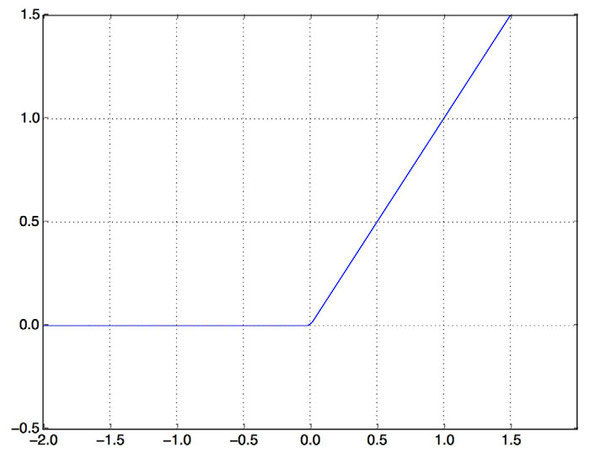

**SIGMOID**

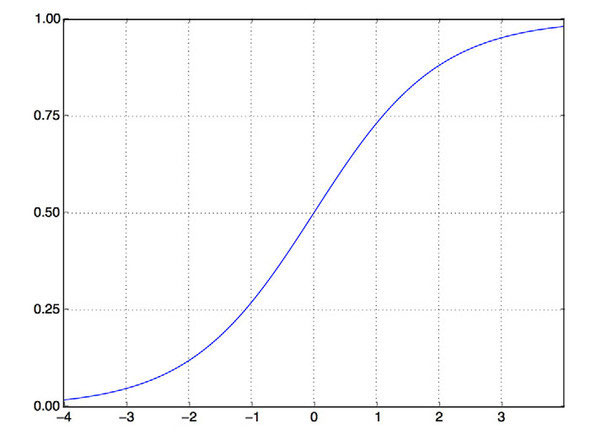

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
# Entrada, un tensor con la crítica vectorizada (10000 valores)
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # capa oculta
model.add(layers.Dense(16, activation='relu'))  # capa oculta
model.add(layers.Dense(1, activation='sigmoid')) # capa de salida

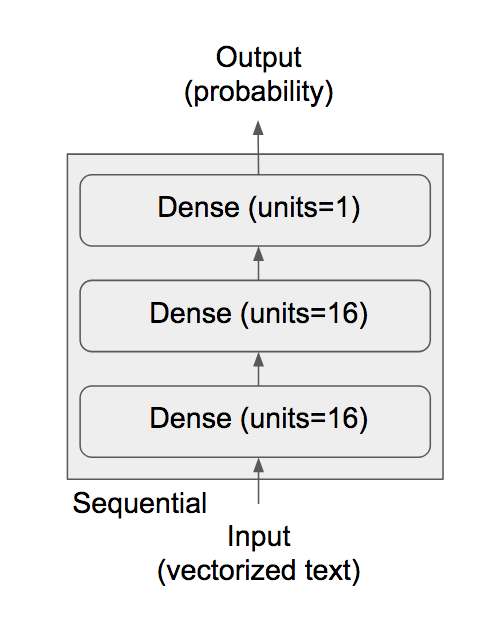

** Las funciones de activación se utilizan en las capas de una red neuronal para introducir no linealidades en el modelo. Sin funciones de activación, todas las capas de la red neuronal serían esencialmente transformaciones lineales de los datos de entrada, lo que limitaría la capacidad de la red para aprender y modelar relaciones no lineales en los datos.

Las funciones de activación son necesarias porque si no, la capa ``Dense``consistiría en solo dos operaciones lineales:
```python
output = dot(W, input) + b
```
, donde W es la matriz de pesos y b es el sesgo, con lo que la capa solo podría aprender transformaciones lineales (afines) de los datos de entrada: el "espacio de hipótesis" de la capa sería el conjunto de todas las transformaciones lineales posibles de los datos en un espacio de 16 dimensiones. => Es un espácio muy restringido y limitaría la capacidad del modelo para aprender patrones complejos en los datos. Añadir mas capas, no ampliaría el espacio de hipótesis. Es por ello por lo que introducimos una función de activación lineal como `relu`. Hay más, como `prelu`, `elu`, etc

* Ejegir **función de pérdida** y un **optimizador**.
* Problema de **clasificación binaria** y la **salida** de nuestra red es una **probabilidad** (terminamos nuestra red con una capa de **una sola unidad** con una activación **sigmoidea**), es mejor usar la pérdida **`binary_crossentropy`**.
* No es la única opción viable: podría usar, por ejemplo, **mean_squared_error**. Pero la **entropía cruzada** suele ser la **mejor opción** cuando se trata de **modelos que generan probabilidades**. La entropía cruzada mide la **"distancia" entre las distribuciones de probabilidad**, o en nuestro caso, entre la distribución de verdad y nuestras predicciones.
* Configuramos nuestro modelo con el optimizador **rmsprop**.
* Supervisaremos la **precisión** durante el entrenamiento.

ELECCION FUNCIÓN DE PÉRDIDA
* **'binary_crossentropy'**: Se utiliza cuando estás realizando una tarea de
clasificación binaria, es decir, cuando tienes dos clases mutuamente excluyentes. En este caso, la red neuronal tiene una sola neurona de salida y la función de activación utilizada en esa neurona es generalmente la sigmoide. La función 'binary_crossentropy' calcula la pérdida para cada ejemplo en función de la diferencia entre la etiqueta real y la probabilidad de que el ejemplo pertenezca a la clase positiva. Es adecuada para problemas como clasificación de sentimiento (positivo o negativo), detección de spam (spam o no spam), etc.

* **'categorical_crossentropy'**: Se usa cuando estás realizando una clasificación multiclase, es decir, cuando hay más de dos clases mutuamente excluyentes. En este caso, la red neuronal tiene múltiples neuronas en la capa de salida, y generalmente se utiliza la función de activación Softmax. La función 'categorical_crossentropy' calcula la pérdida teniendo en cuenta la distribución de probabilidad de las clases. Es adecuada para problemas como clasificación de imágenes con múltiples categorías.

* **'sparse_categorical_crossentropy'**: Se utiliza en situaciones similares a 'categorical_crossentropy', pero cuando las etiquetas reales son representadas como enteros en lugar de codificación one-hot. En este caso, las etiquetas son enteros que indican la clase real de cada ejemplo, en lugar de vectores one-hot. Es útil cuando tienes etiquetas enteras en lugar de representaciones one-hot

In [12]:
# El optimizador se utilizará para ajustar los pesos y sesgos del modelo durante el entrenamiento.
# En este caso, se está utilizando el optimizador 'rmsprop'. RMSprop (Root Mean Square Propagation),
# que se encarga de adaptar la tasa de aprendizaje de forma adaptativa para acelerar la convergencia.

# La función de pérdida (loss) es una medida de cuán bien se está desempeñando el modelo durante el entrenamiento.
# En este caso, se está utilizando 'binary_crossentropy', que es una función de pérdida adecuada para problemas de clasificación binaria.
# Mide la discrepancia entre las predicciones del modelo y las etiquetas reales, y se esfuerza por minimizar esta discrepancia durante el entrenamiento.

# metrics: Las métricas son medidas adicionales utilizadas para evaluar el rendimiento del modelo durante y después del entrenamiento.
# En este caso, se está utilizando 'accuracy', (común para problemas de clasificación) para medir la precisión del modelo al predecir las etiquetas

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

* Estamos pasando nuestro **optimizador**, **función de pérdida** y **métricas** como **cadenas**, lo cual es posible porque rmsprop, binary_crossentropy y precision están **empaquetados como parte de Keras**.
* A veces, es posible que desee configurar los parámetros de su optimizador o pasar una función de pérdida personalizada o una función métrica. Esto primero se puede hacer pasando una instancia de clase de optimizador como argumento del optimizador

In [13]:
# OPTIMIZADOR
# La diferencia  con el codigo anterior es en cómo se configura el optimizador.
# En la otra proporciona directamente el nombre del optimizador, mientras que en esta
# utiliza la clase optimizers de TensorFlow para configurar el optimizador RMSprop con una tasa de aprendizaje específica (épsilon)
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
# LOSS
# La diferencia aqui con el otro codigo es que en lugar de utilizar cadenas directas,
# utilizamos las clases losses y metrics para configurar estos aspectos.
# De esta forma se utiliza las clases proporcionadas por Keras para mayor claridad y consistencia en tu código.
# En términos de funcionalidad, no hay diferencia entre esta versión y la anterior, y ambas compilarán el modelo de la misma manera.
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validar nuestra Aproximación

Crearemos un **"conjunto de validación"** separando 10K muestras de los datos de entrenamiento originales, para monitorizar la precisión del modelo durante el entrenamiento con datos que nunca había visto

In [15]:
# VALIDACION Y ESNTRENAMIENTO PARCIAL ---> EVITAR SOBREENTRENAMIENTO
# Esto se utiliza para dividir el conjunto de datos de entrenamiento en dos partes:
# una parte que se utilizará para la validación del modelo durante el proceso de entrenamiento y
# otra parte que se utilizará para el entrenamiento real del modelo. Esto es una técnica común
# para evaluar el rendimiento del modelo durante el entrenamiento y detectar posibles problemas como el sobreentrenamiento

x_val = x_train[:10000]  # primeras 10,000 críticas

# Aquí, se está creando un conjunto de datos de entrenamiento parcial partial_x_train a partir del conjunto de datos de entrenamiento completo x_train.
# Se excluyen los primeros 10,000 ejemplos y se toman el resto de los ejemplos. Esto crea un subconjunto de datos más grande (los ejemplos restantes) que se utilizará para entrenar el modelo.
partial_x_train = x_train[10000:]


y_val = y_train[:10000]
partial_y_train = y_train[10000:]

* **Entrenamos** nuestro modelo durante **20 épocas** (20 iteraciones sobre todas las muestras en los tensores ``x_train`` e ``y_train``), en **mini lotes de 512 muestras**.
* A la vez, monitorizamos la **pérdida** y la **precisión** de las 10K muestras que separamos. Esto se hace pasando los datos de validación como el argumento ``validation_data``:

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# val_loss empieza disminuyendo, lo que significa que el modelo esta aprendiendo.
# Sin embargo, llega un punto donde vemos que empieza a subir porque hay sobreentrenamiento (EN EPOCA 5 HAY SOBREENTRENAMIENTO).
# El modelo se está adaptando en exceso a los datos de entrenamiento y no generaliza bien a nuevos datos

#  A medida que el modelo aprende, loss suele disminuir, pero es importante estar atento a val_loss # para detectar signos de sobreajuste.
# El sobreajuste no se refleja necesariamente en el valor de loss

# EN EPOCA 4, TENEMOS VAL_ACC = 0.8875 Y VAL_LOSS = 0.2809

# Si cambiamos y tenemos 3 capas densas en vez de 2, el sistema se sobreentrena en la misma época y se obtiene una precisión del 89% en vez del 88%
# si solo tenemos 1 capa oculta, entonces se sobreentrena mas alla de la epoca 7, obteniendo precicion del 88% (TARDA MAS)
# Si en vez de binary crossentropy usamos mse, se sobreentrena en la época 3 en vez de la 4. La precisión es la misma (88%)
# si en vez de relu usamos tanh, obtengo resultados similar a cuando uso binary crossentropy. Se sobreentrena mas alla de la epoca 3, con precision del 88%
# si tenemos capas ocultas con 8 unidades, se sobreentrena mas alla de la epoca 5, con precision del 88%
# si tenemos capas ocultas con 32 unidades, se sobreentrena mas alla de la epoca 2, con precision del 88%



Epoch 1/20
30/30 [==============================] - 5s 132ms/step - loss: 0.5872 - acc: 0.7355 - val_loss: 0.4670 - val_acc: 0.8590
Epoch 2/20
30/30 [==============================] - 3s 90ms/step - loss: 0.3907 - acc: 0.8812 - val_loss: 0.3580 - val_acc: 0.8775
Epoch 3/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2918 - acc: 0.9094 - val_loss: 0.3058 - val_acc: 0.8890
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2350 - acc: 0.9237 - val_loss: 0.2858 - val_acc: 0.8906
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1964 - acc: 0.9377 - val_loss: 0.2764 - val_acc: 0.8894
Epoch 6/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1691 - acc: 0.9458 - val_loss: 0.2763 - val_acc: 0.8900
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1471 - acc: 0.9524 - val_loss: 0.2865 - val_acc: 0.8866
Epoch 8/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1273 - 

* Al final de cada época, hay una pequeña pausa mientras el modelo **calcula su pérdida y precisión** en las 10K muestras de los datos de validación.

* La llamada a ``model.fit()`` devuelve un objeto ``History``. Este objeto tiene un **atributo ``history``**, que es un **diccionario** que contiene datos sobre **todo lo que sucedió durante el entrenamiento**. Echemos un vistazo a esto:

In [17]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['acc'])
print(history_dict['val_loss'])
print(history_dict['val_acc'])

[0.5871759057044983, 0.39070144295692444, 0.2918320298194885, 0.2349734604358673, 0.19641666114330292, 0.1691291183233261, 0.14712615311145782, 0.12731356918811798, 0.1139872595667839, 0.09741124510765076, 0.08637972176074982, 0.07488441467285156, 0.06615253537893295, 0.05482621490955353, 0.047250811010599136, 0.04389801248908043, 0.03551807999610901, 0.03327324986457825, 0.02333267405629158, 0.022439081221818924]
[0.7354666590690613, 0.8812000155448914, 0.9093999862670898, 0.9237333536148071, 0.937666654586792, 0.9458000063896179, 0.9524000287055969, 0.9596666693687439, 0.9661999940872192, 0.9735999703407288, 0.9761999845504761, 0.9815333485603333, 0.9835333228111267, 0.9881333112716675, 0.9904666543006897, 0.990933358669281, 0.9936666488647461, 0.9933333396911621, 0.9974666833877563, 0.9972666501998901]
[0.4669875502586365, 0.35796791315078735, 0.30578184127807617, 0.28580278158187866, 0.2764074206352234, 0.2763206660747528, 0.2865252196788788, 0.28916871547698975, 0.3270948827266693

* El diccionario contiene 4 entradas: una por métrica que se estaba monitorizando durante el entrenamiento y durante la validación.
* Usaremos **Matplotlib** para graficar la **pérdida** de **entrenamiento** y la de **validación** una al lado de otra, así como la **precisión** de **entrenamiento** y **validación**:
* Las posibles diferencias entre una ejecución y otra es debida a la inicialización aleatoria de los pesos

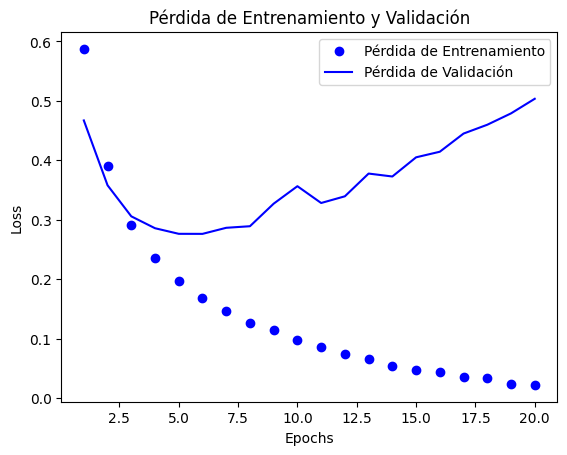

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azul"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')

# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Cuanto mas se entrena, la perdida durante entrenamiento (loss) sigue bajando.
# Sin embargo, en la época 5, la perdida de validacion empieza a subir al haber sobreentrenamiento.

* Se ve claramente que **cuanto más se entrena**, **menor es la pérdida durante el entrenamiento**

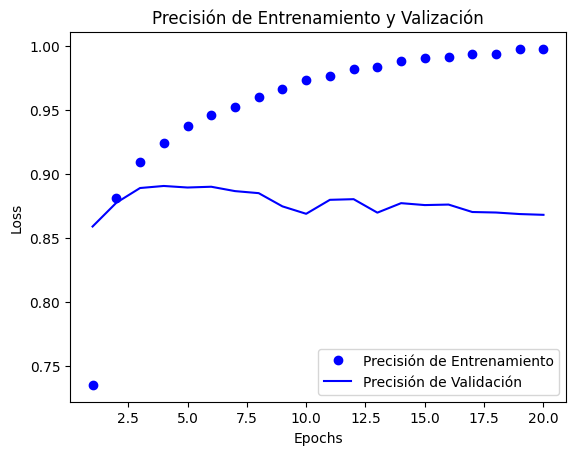

In [19]:
plt.clf()   # Limpia la figura
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Ocurre lo mismo que con la perdida.
# Cuanto mas se entrena, la precision durante entrenamiento (acc) sigue aumentando.
# Sin embargo, en la época 5, la precision de validacion empieza a bajar al haber sobreentrenamiento.

* Se ve claramente que **cuanto más se entrena**, **mayor es la precisión del modelo durante el entrenamiento**

* Eso es lo que esperaría al ejecutar la **optimización del descenso de gradientes**: la cantidad que está tratando de minimizar debería disminuir con cada iteración, como así acurre
* No es el caso de la **pérdida y precisión de la validación**: parecen alcanzar su **punto máximo en la cuarta época**.
* **Un modelo con un desempeño mejor en los datos de entrenamiento no es necesariamente mejor en datos que nunca antes había visto**
* Esto es debido al concepto que llevamos advirtiendo estos dias: **"sobreajuste"**:
* Tras cada segunda repetición, estamos **sobreoptimizando los datos de entrenamiento** y terminamos **aprendiendo representaciones que son específicas de los datos de entrenamiento** y **no se generalizan** a datos fuera del conjunto de entrenamiento.
* **EVITAR SOBREAJUSTE**:
  - Dejar de entrenar después de tres épocas.

Lo veremos con más detalle más adelante

Entrenemos una nueva red desde cero durante cuatro épocas, luego la evaluaremos con nuestros datos de prueba:

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 48ms/step - loss: 0.4644 - accuracy: 0.8166
Epoch 2/4
49/49 [==============================] - 2s 43ms/step - loss: 0.2925 - accuracy: 0.8991
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2351 - accuracy: 0.9191
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2760 - accuracy: 0.8896


In [22]:
results

[0.27598991990089417, 0.8895999789237976]

Este es un **enfoque bastante naive**, pero consigue una exactitud del 88%. Con efoques de última generación, llegaríamos facilmente al 95%

## Usando la red entrenada para generar predicciones sobre nuevos datos

Una vez con la red entrenada, queremos usarla en un entorno práctico. Podemos **generar la probabilidad** de que las críticas sean positivas utilizando el método ``predict``

In [23]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.26271322],
       [0.9996141 ],
       [0.83890504],
       ...,
       [0.13255502],
       [0.12462933],
       [0.5716392 ]], dtype=float32)

La red tiene confianza con algunas muestras (0.99 o más, o 0.01 o menos), pero menos confianza en otras (0.6 o 0.4)

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Pérdida con los datos de test:", test_loss)
print("Precisión con los datos de test:", test_acc)

782/782 [==============================] - 4s 5ms/step - loss: 0.2760 - accuracy: 0.8896
Pérdida con los datos de test: 0.27598991990089417
Precisión con los datos de test: 0.8895999789237976


## Experimentos Adicionales y Conclusiones

* Usamos 2 capas ocultas. Intentad usar 1 o 3 capas ocultas y mirar cómo afecta la validación y la precisión de la prueba.

**RESULTADO: Si cambiamos y tenemos 3 capas densas en vez de 2, el sistema se sobreentrena en la misma época y se obtiene una precisión del 89% en vez del 88%**
Resultado con 3 capas: obviamente aprende mas detalles pero hay overfitting/SOBREENTRENAMIENTO. Cuanto masyor infraestructura de red (mas capas,epocas...), mayor detalle y rapidez en la red pero mas sobreentrenamiento.

grados de libertad suficientemente complejo para que el sistema aprenda de los datos pero que no sea demasiado

IMPORTANTE MIRAR LOS LOS VALORES DE VAL_ACC Y VAL_LOSS EN LOS DE TEST, NO EN LOS DE ENTRENAMIENTO

CRITICO: EPOCAS, NUMERO DE CAPAS, NUMERO DE NEURONAS, FUNCION DE PERDIDA (TODO ESTO SON LOS HIPERPARAMETROS: SE PUEDEN MODIFICAR)

**si solo tenemos 1 capa oculta, entonces se sobreentrena mas alla de la epoca 7, obteniendo precicion del 88% (TARDA MAS)**


* Intentad utilizar capas con unidades más ocultas o unidades menos ocultas: 8 unidades, 32 unidades, etc

**RESULTADO: si tenemos capas ocultas con 8 unidades, se sobreentrena mas alla de la epoca 5, con precision del 88%. Si tenemos capas ocultas con 32 unidades, se sobreentrena mas alla de la epoca 2, con precision del 88%. Esto es malo poque lleva pocas epocas y quizas no ha aprendido lo suficiente**

* Intentad utilizar la función de pérdida ``mse`` en lugar de ``binary_crossentropy``.

**RESULTADO: Si en vez de binary crossentropy usamos mse, se sobreentrena en la época 3 en vez de la 4. La precisión es la misma (88%)**


* Intentad usar la activación ``tanh`` (una activación que era popular en los primeros días de las redes neuronales) en lugar de ``relu``.

**RESULTADO: si en vez de relu usamos tanh, obtengo resultados similar a cuando uso binary crossentropy. Se sobreentrena mas alla de la epoca 3, con precision del 88%**


* Estos experimentos te ayudarán a convencerte de que las elecciones de arquitectura que hemos elegido son todas bastante razonables, ¡aunque aún se pueden mejorar!

**¿Qué cosas deberíamos haber aprendido de este ejemplo?**

* Por lo general, es necesario realizar un poco de **preprocesamiento en sus datos de entrada** ,sin procesar, para poder alimentarlos, **como tensores**, en una red neuronal. En el caso de secuencias de palabras, se pueden codificar como vectores binarios, pero también existen otras opciones de codificación.
* Las **pilas de capas densas** con **activaciones de ``relu``** pueden resolver una amplia gama de problemas (incluida la **clasificación de sentimientos**), y es probable que las uséis con frecuencia.
* En un **problema de clasificación binaria** (dos clases de salida), su red debe **terminar** con **una capa densa con 1 unidad** y una **activación sigmoidea**, es decir, la salida de su red debe ser un escalar entre 0 y 1, codificando una **probabilidad**.
* Con una **salida sigmoide escalar**, en un problema de **clasificación binaria**, la función de pérdida que debe usar es ``binary_crossentropy``.
* El optimizador ``rmsprop`` es generalmente una buena opción de optimizador, **sea cual sea su problema**. Una cosa menos de la que preocuparte.
* A medida que mejoran con sus datos de entrenamiento, las redes neuronales eventualmente comienzan a **sobreajustarse** y terminan **obteniendo resultados cada vez peores en datos nunca antes vistos**. Asegúrese de **supervisar siempre el rendimiento de los datos que están fuera del conjunto de entrenamiento**.

---